### Import Packages

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import sys

### Import Datasets

In [3]:
quiet = pd.read_csv("spiro-quiet.csv")
deep = pd.read_csv("spiro-deep.csv")
run = pd.read_csv("spiro-run.csv")

dataset = [quiet, deep, run]
dataset_names = ["quiet", "deep", "run"]
run

Run 1: Time (s)  Run 1: Flow Rate (L/s)  Run 1: Volume (L)  \
0             0.000000               -0.116638           0.000000   
1             0.016667               -0.155319           0.002266   
2             0.033334               -0.184479           0.005098   
3             0.050001               -0.223160           0.008495   
4             0.066668               -0.232681           0.012294   
...                ...                     ...                ...   
17995       299.922665               -0.329681          -0.933501   
17996       299.939332               -0.358841          -0.927763   
17997       299.955999               -0.378479          -0.921619   
17998       299.972666               -0.407043          -0.915073   
17999       299.989333               -0.426682          -0.908125   

       Run 2: Time (s)  Run 2: Flow Rate (L/s)  Run 2: Volume (L)  \
0             0.000000               -0.002380           0.000000   
1             0.016667                0.007736          -0.000045   
2             0.033334                0.007736          -0.000174   
3             0.050001               -0.002380          -0.000218   
4             0.066668                0.007736          -0.000263   
...                ...                     ...                ...   
17995              NaN                     NaN                NaN   
17996              NaN                     NaN                NaN   
17997              NaN                     NaN                NaN   
17998              NaN                     NaN                NaN   
17999              NaN                     NaN                NaN   

       Run 3: Time (s)  Run 3: Flow Rate (L/s)  Run 3: Volume (L)  
0             0.000000               -0.184478          -0.000000  
1             0.016667               -0.213638           0.003318  
2             0.033334               -0.223754           0.006963  
3             0.050001               -0.213638           0.010608  
4             0.066668               -0.174957           0.013846  
...                ...                     ...                ...  
17995              NaN                     NaN                NaN  
17996              NaN                     NaN                NaN  
17997              NaN                     NaN                NaN  
17998              NaN                     NaN                NaN  
17999              NaN                     NaN                NaN  

[18000 rows x 9 columns]

### Create Graphs

#### Define Function for Graphing

In [47]:
def get_name(variable):
    return f'{variable=}'.split('=')[0]



def plot(dataset, run_count, names=["quiet", "deep", "Spirometry Run"]):
    # plt.figure(run_count)
    # Plot 1

    plt.subplot(211)
    plt.title("Time(s) vs. Lung Volume(L)")
    plt.xlabel("Time (s)")
    plt.ylabel("Lung Volume (L)")
    plt.scatter(
        dataset[f'Run {run_count}: Time (s)'], 
        dataset[f'Run {run_count}: Volume (L)'], 
        label=names[run_count-1],
        s=0.5)
    # # Plot 2
    # plt.subplot(212)
    # plt.title("Volume(L) vs. Flow Rate (L/s)")
    # plt.xlabel("Volume (L)")
    # plt.ylabel("Flow Rate (L/s)")
    # plt.plot(dataset[f'Run {run_count}: Volume (L)'], dataset[f"Run {run_count}: Flow Rate (L/s)"], label=names[run_count-1])

    plt.legend()


def segmenting_in_plot(dataset, start_time = 30, time_length=180, run_count=1):
    vars(sys.modules[__name__])[f"{dataset}_segmented"] = dataset[
        (dataset[f'Run {run_count}: Time (s)'] < (start_time + time_length)) 
        & 
        (dataset[f'Run {run_count}: Time (s)'] > start_time)]

def segmenting(dataset, start_time = 30, time_length=180, run_count=1):
    return dataset[
        (dataset[f'Run {run_count}: Time (s)'] < (start_time + time_length)) 
        & 
        (dataset[f'Run {run_count}: Time (s)'] > start_time)]

#### Graph all graphs

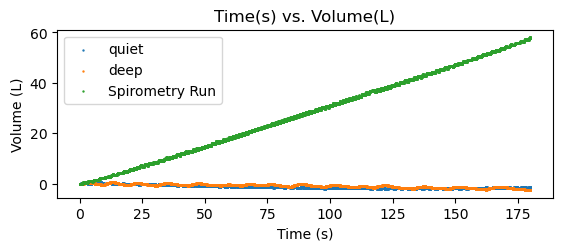

In [5]:
for i in range(len(dataset)):
    segmenting_in_plot(dataset[i], start_time=0, time_length=180, run_count=i+1)
    plot(vars(sys.modules[__name__])[f"{dataset[i]}_segmented"], run_count=i+1)
    

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_5142/3892915104.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


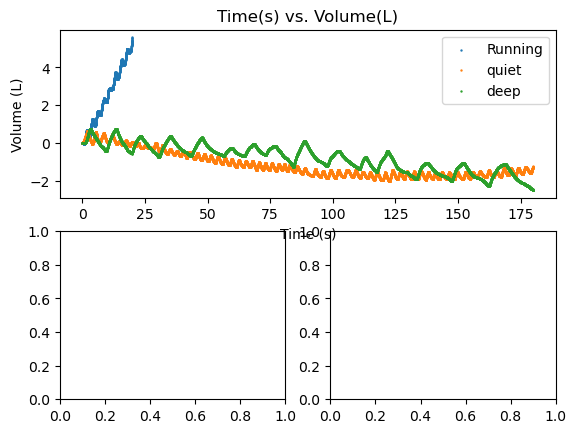

In [6]:
# Segmenting Data
segmented_quiet = segmenting(quiet, start_time=0, time_length=180)
segmented_deep = segmenting(deep, start_time=0, time_length=180, run_count=1)
segmented_run = segmenting(run, start_time=0, time_length=20, run_count=2)

fig, axs = plt.subplots(2, 2)
plot(segmented_run, run_count=3, names=["Running"]*3)
plot(segmented_quiet, run_count=1, names=["quiet"]*3)
plot(segmented_deep,run_count=2, names=["deep"]*3)

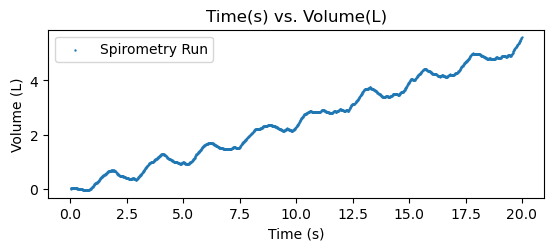

In [7]:
plot(segmented_run, run_count=3, names=["Spirometry Run"]*3)

#### Graph Running and Rotated Sine Wave

##### rotate_matrix function

In [8]:
import math
# Rotation matrix function
def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr

##### Sine Wave + Rotated + Running

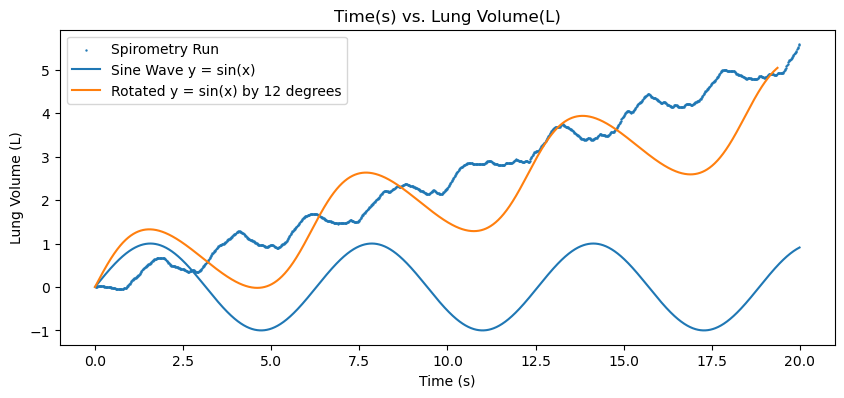

In [50]:
# Plot a sine wave
x = np.arange(0, 20, 0.01)
# Amplitude of the sine wave is sine of a variable like time
y = np.sin(x)
xr, yr = rotate_matrix(x, y, angle=12)

fig = plt.figure(figsize=(10, 9))
plot(segmented_run, run_count=3, names=["Spirometry Run"]*3)
plt.plot(x, y, label="Sine Wave y = sin(x)")
plt.plot(xr, yr, label="Rotated y = sin(x) by 12 degrees")
plt.legend()

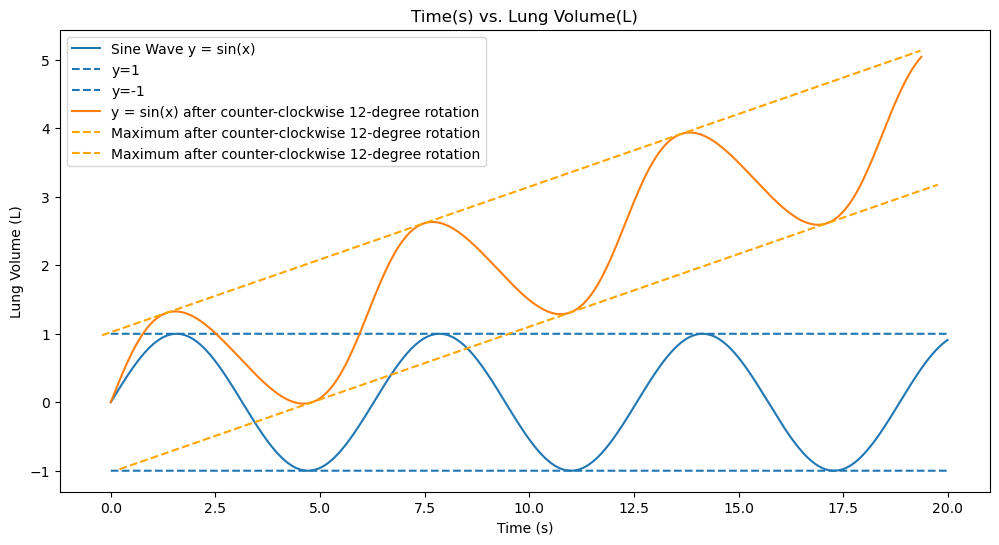

In [46]:
max_x = np.arange(0, 20, 0.01)
max_y = np.ones(2000)
min_y = -(max_y)

max_xr, max_yr = rotate_matrix(max_x, max_y, angle=12)
min_xr, min_yr = rotate_matrix(max_x, min_y, angle=12)


fig = plt.figure(figsize=(12, 6))

plt.title("Time(s) vs. Lung Volume(L)")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")

plt.plot(x, y, label="Sine Wave y = sin(x)")
plt.plot(max_x, max_y, label="y=1", linestyle="dashed", color="#1f77b4")
plt.plot(max_x, min_y, label="y=-1", linestyle="dashed", color="#1f77b4")
plt.plot(xr, yr, label="y = sin(x) after counter-clockwise 12-degree rotation")
plt.plot(max_xr, max_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.plot(min_xr, min_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.legend()

In [10]:
max(xy, key=tuple)

NameError: name 'xy' is not defined